In [1]:
import matplotlib.pyplot as plt
import rosbag_pandas

%matplotlib inline

In [2]:
df1 = rosbag_pandas.bag_to_dataframe("2017-01-10-23-30-49.bag", include="/ardrone/pose")
df1.columns = ["d", "a", "b", "c", "x", "y", "z"]
df1.head()

,d,a,b,c,x,y,z
2017-01-10 23:30:50.001575936,1.0,-0.000005,0.000029,-0.000001,-1.152437,1.261760,0.378907
2017-01-10 23:30:50.010031872,1.0,0.000024,0.000035,-0.000008,-1.152439,1.261770,0.378910
2017-01-10 23:30:50.018437888,1.0,-0.000022,0.000031,-0.000009,-1.152441,1.261760,0.378907
2017-01-10 23:30:50.026855424,1.0,0.000003,0.000018,-0.000007,-1.152443,1.261770,0.378905
2017-01-10 23:30:50.034953728,1.0,0.000004,0.000045,-0.000003,-1.152443,1.261762,0.378900


In [3]:
df2 = rosbag_pandas.bag_to_dataframe("2017-01-10-23-34-26.bag", include="/ardrone/pose")
df2.columns = ["d", "a", "b", "c", "x", "y", "z"]
df2.head()

,d,a,b,c,x,y,z
2017-01-10 23:34:26.891394048,0.998732,-0.000739,-0.000643,0.050330,-1.153604,1.264819,0.378864
2017-01-10 23:34:26.900459776,0.998733,-0.000658,-0.000631,0.050324,-1.153577,1.264823,0.378851
2017-01-10 23:34:26.907865856,0.998729,-0.000604,-0.000675,0.050399,-1.153588,1.264834,0.378835
2017-01-10 23:34:26.916918016,0.998732,-0.001025,-0.000649,0.050328,-1.153582,1.264850,0.378831
2017-01-10 23:34:26.924537600,0.998732,-0.000481,-0.000576,0.050336,-1.153590,1.264814,0.378820


In [4]:
from collections import namedtuple

In [5]:
Coords = namedtuple("Coords", "x y")

In [6]:
def load_bag(bagfile, topics="/ardrone/pose"):
    return rosbag_pandas.bag_to_dataframe(bagfile, include=topics)

def load_pose(bagfile):
    df = load_bag(bagfile)
    df.columns = ["d", "a", "b", "c", "x", "y", "z"]
    return df

In [11]:
def plot_xy(df, target_coords=(Coords(-1, 3.6), Coords(-2, 1.6))):
    """
    Coords in real frame. +x is towards doors, +y is away from table.
    
    """
    p_init = Coords(df.x[0], df.y[0])
    df.plot.scatter("x", "y", c=df.index, cmap="viridis", sharex=False)
    plt.scatter(p_init.x, p_init.y, c="r")
    for coord in target_coords:
        plt.scatter(p_init.x - coord.x, p_init.y - coord.y, c="r")

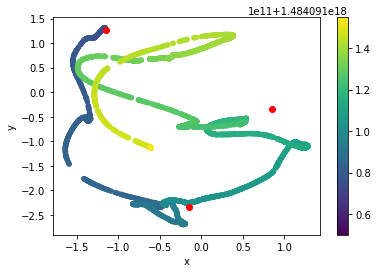

In [12]:
plot_xy(df1)

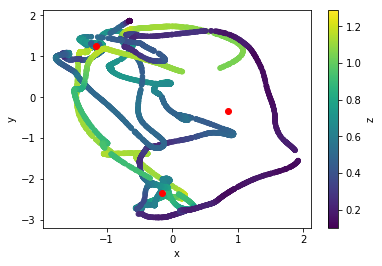

In [14]:
plot_xy(df2)

In [47]:
dfnd = load_bag("2017-01-10-23-30-49.bag", topics="/ardrone/navdata")

In [59]:
dfnd.columns = "altd ax ay az batt magX magY magZ motor1 motor2 motor3 motor4 pressure rotX rotY rotZ state tags_count temp tm vx vy vz wind_angle wind_comp_angle wind_speed".split()
dfnd.columns

Index([u'altd', u'ax', u'ay', u'az', u'batt', u'magX', u'magY', u'magZ',
       u'motor1', u'motor2', u'motor3', u'motor4', u'pressure', u'rotX',
       u'rotY', u'rotZ', u'state', u'tags_count', u'temp', u'tm', u'vx', u'vy',
       u'vz', u'wind_angle', u'wind_comp_angle', u'wind_speed'],
      dtype='object')

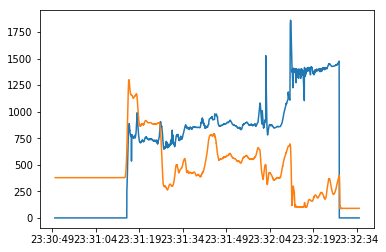

In [63]:
plt.plot(dfnd.index, dfnd.altd)
plt.plot(df1.index, df1.z*1000)